In [1]:
# load dataset and basic data
import numpy as np  # Sayısal işlemler için
import pandas as pd  # Veri işleme için
import matplotlib.pyplot as plt  # Grafik çizimi için
import seaborn as sns  # İleri görselleştirme için

from sklearn.linear_model import LogisticRegression  # Lojistik regresyon modeli
from sklearn.preprocessing import StandardScaler  # Veriyi ölçeklendirmek için
from sklearn.model_selection import train_test_split, GridSearchCV  # Veri bölme ve hiperparametre arama
from sklearn.metrics import accuracy_score, roc_curve  # Doğruluk ve ROC eğrisi için

import warnings
warnings.filterwarnings("ignore")  # Uyarıları gizle

df = pd.read_csv("heart.csv")  # Veri setini oku

describe = df.describe()  # Temel istatistikleri göster

print(df.info())  # Veri tipleri ve boş değerleri göster

"""
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
"""

print()

# Eksik değerlerin olup olmadığını kontrol et
print(df.isnull().sum())
"""
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


'\nage         0\nsex         0\ncp          0\ntrtbps      0\nchol        0\nfbs         0\nrestecg     0\nthalachh    0\nexng        0\noldpeak     0\nslp         0\ncaa         0\nthall       0\noutput      0\ndtype: int64\n'

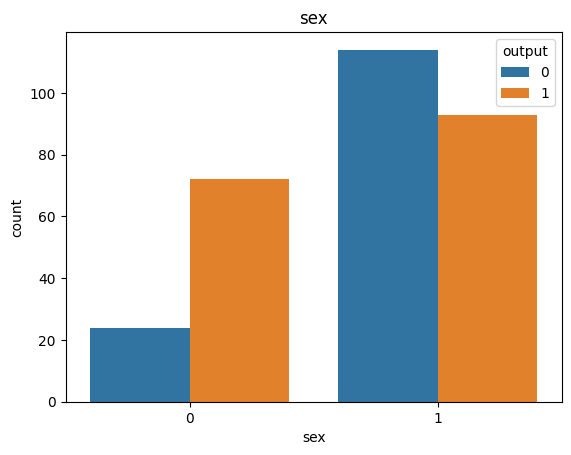

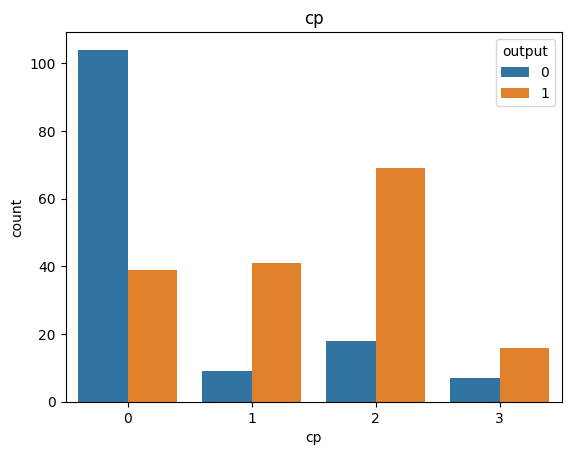

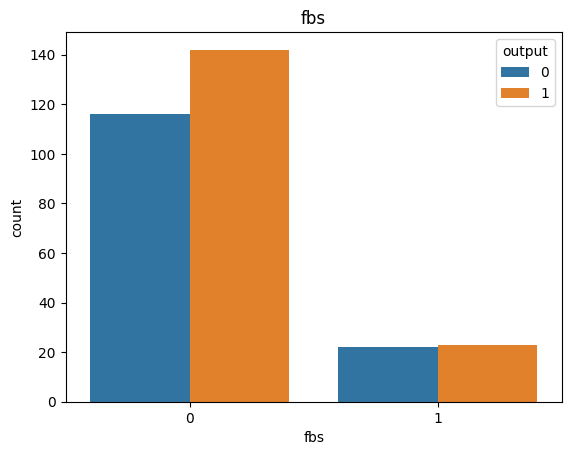

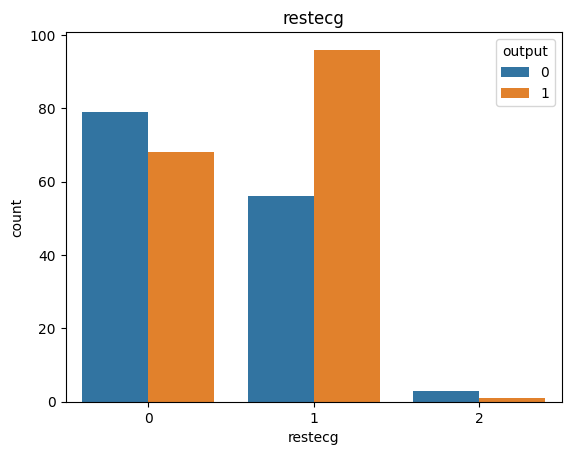

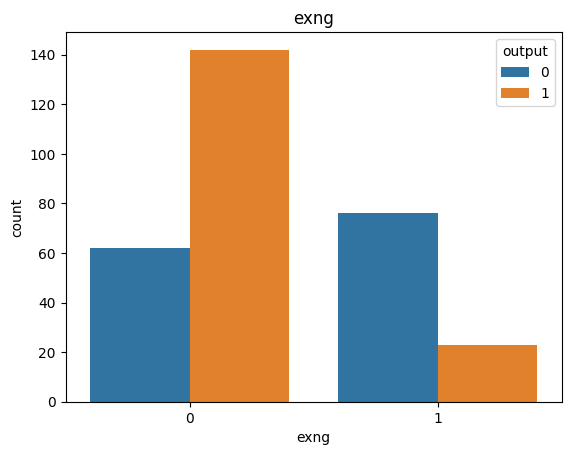

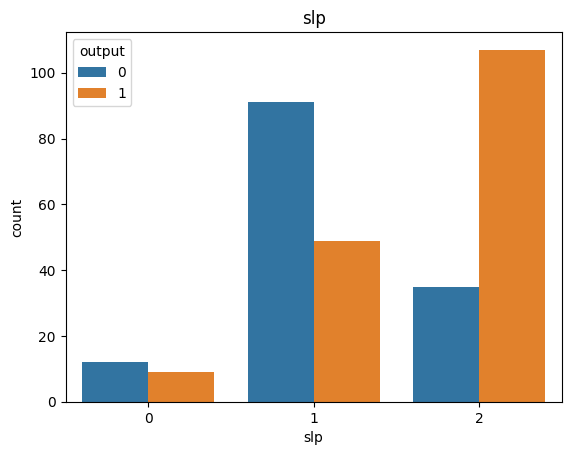

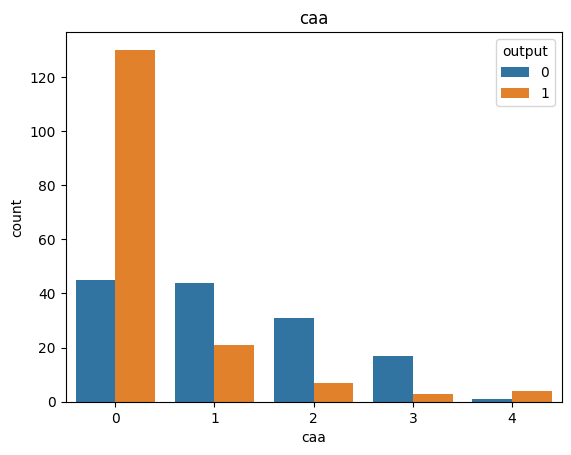

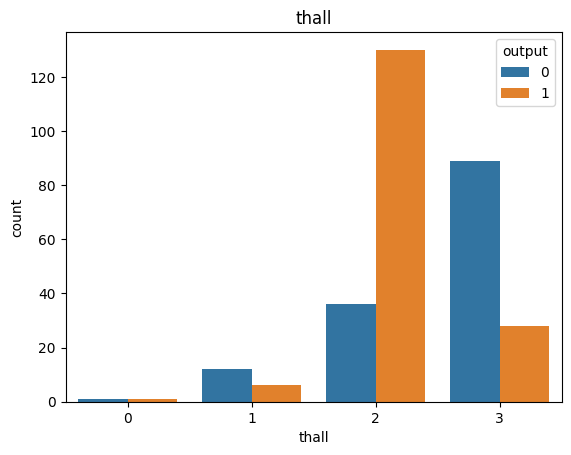

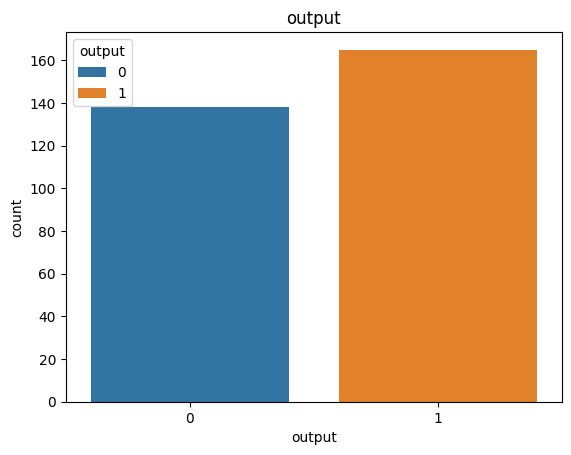

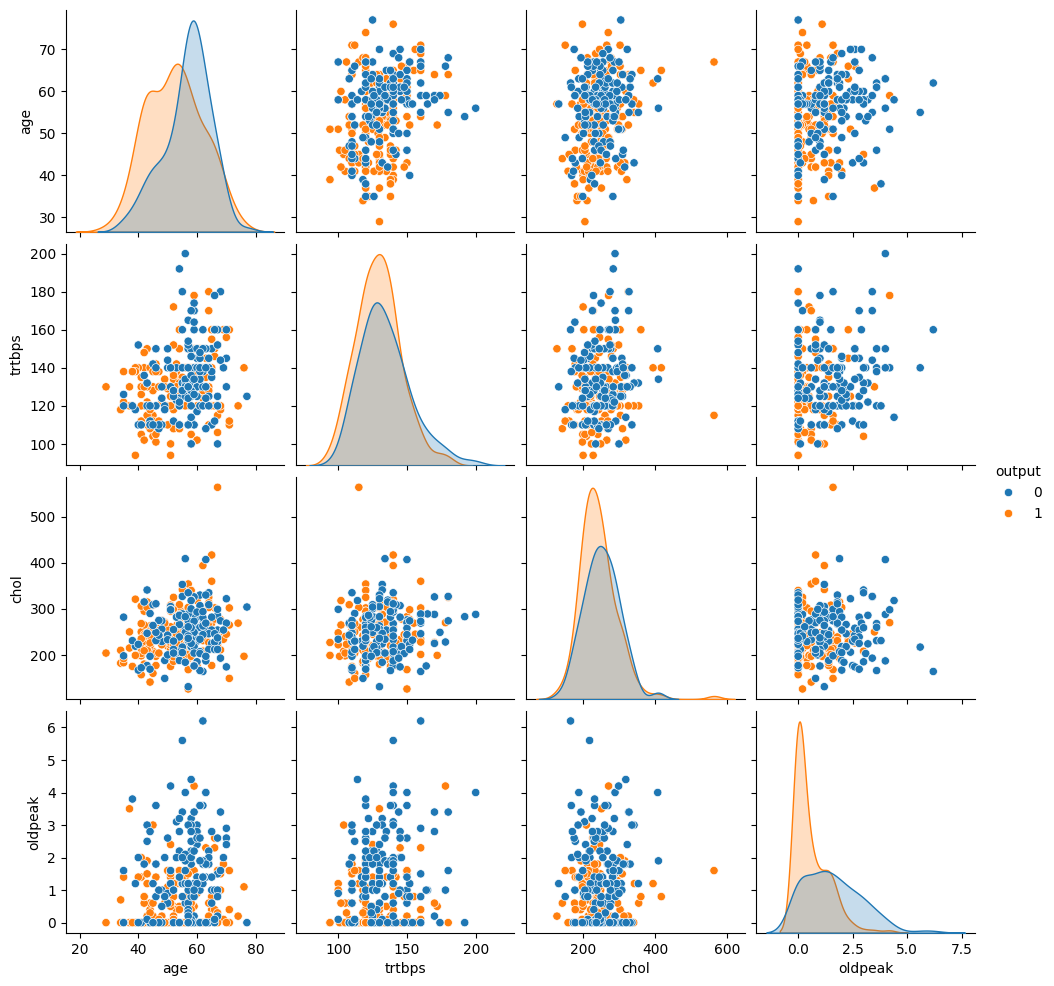

In [2]:
# categorical and numerical feature analysis

df.columns  # Veri sütunlarını listele
"""
Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')
"""

# Kategorik değişkenler listesi
categorical_list = ['sex', 'cp','fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

df_categorical = df.loc[:, categorical_list]  # Kategorik sütunları seç

# Her kategorik değişken için 'output'a göre dağılım grafiği çiz
for i in categorical_list:
    plt.figure()
    sns.countplot(x=i, data=df_categorical, hue="output")  # Kategorik değişkenin sınıf bazlı dağılımı
    plt.title(i)  # Grafik başlığı

# Sayısal değişkenler listesi
numeric_list = ['age','trtbps', 'chol', 'oldpeak','output']
df_numeric = df.loc[:, numeric_list]  # Sayısal sütunları seç

# Sayısal değişkenlerin 'output'a göre dağılımını gösteren çift değişkenli grafik
sns.pairplot(df_numeric, hue="output", diag_kind="kde")  # KDE ile dağılımın yoğunluğu
plt.show()  # Grafikleri göster


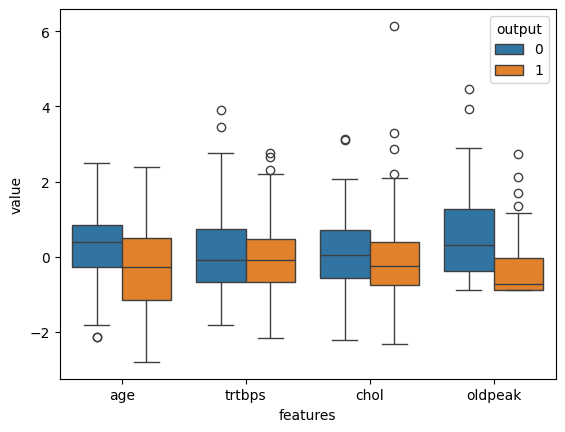

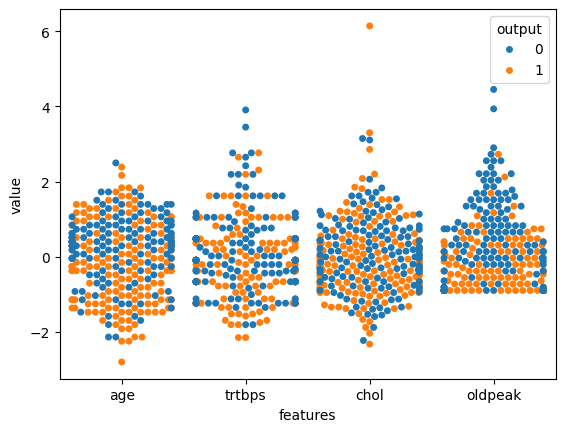

<Figure size 640x480 with 0 Axes>

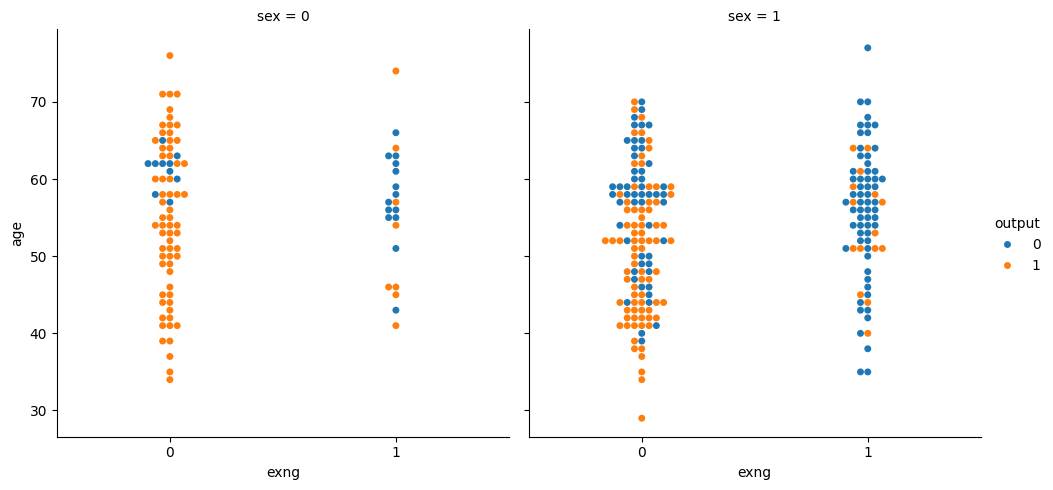

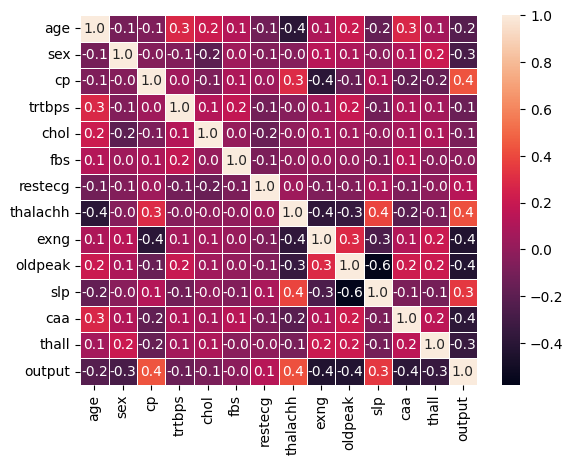

In [3]:
# EDA: Boxplot, Swarmplot, Categorical ve Korelasyon Analizi

# Sayısal sütunlar için StandardScaler ile ölçeklendirme
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df[numeric_list[:-1]])  # Son sütun "output" hariç

# Ölçeklendirilmiş veriyi DataFrame yap, "output" ile birleştir
df_dummy = pd.DataFrame(scaled_array, columns = numeric_list[:-1])
df_dummy = pd.concat([df_dummy, df.loc[:, "output"]], axis = 1)

# Boxplot ile değişkenlerin dağılımını ve aykırı değerleri görselleştir
data_melted = pd.melt(df_dummy, id_vars="output", var_name="features", value_name="value")

plt.figure()
sns.boxplot(x="features", y="value", hue="output", data=data_melted)
plt.show()

# Swarmplot ile dağılımın noktalarını göster
plt.figure()
sns.swarmplot(x="features", y="value", hue="output", data=data_melted)
plt.show()

# Categorical plot: 'exng'ye göre 'age'in dağılımı, cinsiyete göre sütunlar halinde
plt.figure()
sns.catplot(x="exng", y="age", hue="output", col="sex", kind="swarm", data=df)
plt.show()

# Korelasyon matrisi ısı haritası
plt.figure()
sns.heatmap(df.corr(), annot=True, fmt=".1f", linewidths=0.7)
plt.show()

In [4]:
numeric_list = ['age','trtbps', 'chol', 'oldpeak','output']
df_numeric = df.loc[:, numeric_list]

for i in numeric_list:
    Q1 = np.percentile(df[i], 25)  # 1. çeyrek
    Q3 = np.percentile(df[i], 75)  # 3. çeyrek
    IQR = Q3 - Q1                  # Çeyrekler arası açıklık (IQR)

    print(f"{i} sütunu için eski veri şekli: {df.shape}")

    üst_sınır = Q3 + 2.5 * IQR    # Üst sınır belirleme
    alt_sınır = Q1 - 2.5 * IQR    # Alt sınır belirleme

    üst_endeks = df[df[i] > üst_sınır].index  # Üst sınır dışındaki satır indeksleri
    alt_endeks = df[df[i] < alt_sınır].index  # Alt sınır dışındaki satır indeksleri

    try:
        df.drop(üst_endeks, inplace=True)     # Üst sınır dışındakileri sil
        print(f"{i}: Üst sınır dışı değerlerden silinen satır sayısı: {len(üst_endeks)}")
    except Exception as e:
        print(f"{i}: Üst sınır dışı değer silinirken hata oluştu - {e}")

    try:
        df.drop(alt_endeks, inplace=True)     # Alt sınır dışındakileri sil
        print(f"{i}: Alt sınır dışı değerlerden silinen satır sayısı: {len(alt_endeks)}")
    except Exception as e:
        print(f"{i}: Alt sınır dışı değer silinirken hata oluştu - {e}")

    print(f"{i} sütunu için yeni veri şekli: {df.shape}\n")

age sütunu için eski veri şekli: (303, 14)
age: Üst sınır dışı değerlerden silinen satır sayısı: 0
age: Alt sınır dışı değerlerden silinen satır sayısı: 0
age sütunu için yeni veri şekli: (303, 14)

trtbps sütunu için eski veri şekli: (303, 14)
trtbps: Üst sınır dışı değerlerden silinen satır sayısı: 2
trtbps: Alt sınır dışı değerlerden silinen satır sayısı: 0
trtbps sütunu için yeni veri şekli: (301, 14)

chol sütunu için eski veri şekli: (301, 14)
chol: Üst sınır dışı değerlerden silinen satır sayısı: 1
chol: Alt sınır dışı değerlerden silinen satır sayısı: 0
chol sütunu için yeni veri şekli: (300, 14)

oldpeak sütunu için eski veri şekli: (300, 14)
oldpeak: Üst sınır dışı değerlerden silinen satır sayısı: 1
oldpeak: Alt sınır dışı değerlerden silinen satır sayısı: 0
oldpeak sütunu için yeni veri şekli: (299, 14)

output sütunu için eski veri şekli: (299, 14)
output: Üst sınır dışı değerlerden silinen satır sayısı: 0
output: Alt sınır dışı değerlerden silinen satır sayısı: 0
output s

Test accuracy: 0.9333333333333333


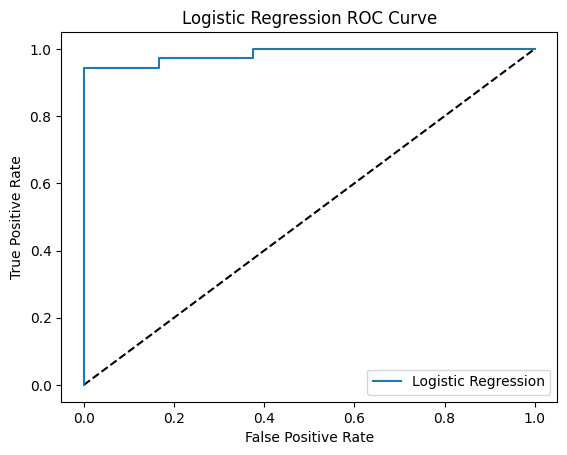

Best parameters: {'penalty': 'l2', 'solver': 'liblinear'}
Test accuracy after tuning: 0.9333333333333333


In [5]:
# Modelling ve Hiperparametre Ayarı

df1 = df.copy()  # Orijinal veriyi korumak için kopyala

# Kategorik değişkenleri one-hot encoding ile sayısala çevir, ilk sütun düşürülür (drop_first=True)
df1 = pd.get_dummies(df1, columns=categorical_list[:-1], drop_first=True)

X = df1.drop(["output"], axis=1)  # Özellikler (output hariç)
y = df1["output"]  # Hedef değişken

# Sayısal sütunları ölçeklendir
scaler = StandardScaler()
X[numeric_list[:-1]] = scaler.fit_transform(X[numeric_list[:-1]])

# Eğitim ve test veri setlerine ayır, random_state ile tekrarlanabilirlik sağla
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lojistik Regresyon Modeli
logreg = LogisticRegression()
logreg.fit(X_train, y_train)  # Modeli eğit

# Test setinde olasılık tahminleri al
y_pred_prob = logreg.predict_proba(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # En yüksek olasılık olan sınıfı seç

# Doğruluk skorunu yazdır
print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")

# ROC eğrisi için gerçek pozitif ve yanlış pozitif oranları hesapla
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob[:, 1])  # Pozitif sınıfın olasılıklarını kullan

# ROC eğrisini çiz
plt.plot([0, 1], [0, 1], "k--")  # Rastgele sınıflandırıcı için referans çizgi
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend()
plt.show()

# Hiperparametre ayarlaması (Grid Search) - ceza terimleri ve solver denemesi
lr = LogisticRegression()
parameters = {"penalty": ["l1", "l2"], "solver": ["liblinear"]}  # liblinear solver sadece l1 ve l2 destekler

lr_searcher = GridSearchCV(lr, parameters)
lr_searcher.fit(X_train, y_train)  # En iyi parametreleri bul

# En iyi parametreleri ve test doğruluğunu yazdır
print(f"Best parameters: {lr_searcher.best_params_}")
y_pred = lr_searcher.predict(X_test)
print(f"Test accuracy after tuning: {accuracy_score(y_test, y_pred)}")